In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from classy import Class
from matplotlib.lines import Line2D
from smt.sampling_methods import LHS
from matplotlib.pyplot import cm
from uqpylab import sessions
from scipy.interpolate import interp1d
from scipy.spatial.distance import pdist
import statistics as st
import os, sys, warnings
from configparser import ConfigParser
from itertools import chain
import math
import seaborn as sns
from collections import defaultdict

def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))

data_kgb = nested_dict(5, list)
data_kev = nested_dict(5, list)

/home/ahmad/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/ahmad/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# KGB-evolution

In [3]:
import os, sys, warnings
import h5py
import matplotlib.colors as colors
from configparser import ConfigParser
from itertools import chain


folder_name_kgb = 'data/snapshots'
#folder_name_kgb = 'imp'


parser = ConfigParser()
with open(f"./../{folder_name_kgb}/file_classparameters.ini") as lines:
    lines = chain(("[top]",), lines) # This line produce a fake section header called top
    parser.read_file(lines)

h = float(parser.get("top", "h"))
Omega_b = float(parser.get("top", "Omega_b"))
Omega_cdm = float(parser.get("top", "Omega_cdm"))
#m_ncdm = float(parser.get("top", "m_ncdm"))
n_s = float(parser.get("top", "n_s"))
A_s = float(parser.get("top", "A_s"))
gravity_model = (parser.get("top", "gravity_model"))

#Omega_smg = float(parser.get("top", "Omega_smg"))
Omega_Lambda = float(parser.get("top", "Omega_Lambda"))
Omega_fld = float(parser.get("top", "Omega_fld"))

# Extract and parse the 'parameters_smg' string
parameters_smg_str = parser.get("top", "parameters_smg")
parameters_smg_list = parameters_smg_str.split(',')



if len(parameters_smg_list) < 2:
    raise ValueError("parameters_smg must contain at least two values: alpha_k and alpha_b.")

# Convert the first two parameters to floats
alpha_K_hat = float(parameters_smg_list[0].strip())
alpha_B_hat = float(parameters_smg_list[1].strip())


# Extract and parse the 'parameters_smg' string
expansion_smg_str = parser.get("top", "expansion_smg")
expansion_smg_list = expansion_smg_str.split(',')

Omega_smg = float(expansion_smg_list[0].strip())
w0 = float(expansion_smg_list[1].strip())
wa = float(expansion_smg_list[2].strip())

# Function to format numbers for LaTeX (reusing the previous function)
def format_scientific_latex(number):
    mantissa, exponent = f"{number:.1e}".split('e')
    exponent = exponent.lstrip('+').lstrip('0') or '0'
    return f"{mantissa} \\times 10^{{{exponent}}}"

# Format the alpha values
alpha_K_hat_latex = format_scientific_latex(alpha_K_hat)

# reading the redshifts

z = []

with open(f'./../{folder_name_kgb}/file_settings_used.ini', 'r') as f:
    for line in f:
        if line.startswith('Pk redshifts'):
            # Extract the part after '=' and split by commas
            redshifts_string = line.split('=')[1].split('#')[0].strip()  # Remove comments after #
            z = [float(x.strip()) for x in redshifts_string.split(',')]  # Parse as floats
            
with open(f"./../{folder_name_kgb}/file_settings_used.ini") as lines:
    lines = chain(("[top]",), lines) # This line produce a fake section header called top
    parser.read_file(lines)


boxsize = float(parser.get("top", "boxsize"))
Ngrid = float(parser.get("top", "Ngrid"))

boxsize = int(boxsize)
Ngrid = int(Ngrid)

k_nyq = np.pi*Ngrid/boxsize

# nKe_numsteps   = float(parser.get("top", "nKe_numsteps"))
Courant_factor = float(parser.get("top", "Courant factor"))

redshifts = z



for i in range(np.shape(redshifts)[0]):
    # Format `i` to ensure filenames are correct
    file_index = str(i).zfill(2)  # Pads with one leading zero if `i` is a single digit
    
    # Load data using the formatted `file_index`
    data_kgb["kgb"]["pi"]["z=" + str(redshifts[i])] = np.loadtxt(
        f"./../{folder_name_kgb}/pk_0{file_index}_pi_k.dat"
    )

    kk_kgb = data_kgb["kgb"]["pi"]["z=" + str(redshifts[i])][:, 0]
    
#     data_kev["kev"]["pi"]["z=" + str(redshifts[i])] = np.loadtxt(
#         f"./../{folder_name_kev}/pk_0{file_index}_pi_k.dat"
#     )

#     kk_kev = data_kev["kev"]["pi"]["z=" + str(redshifts[i])][:, 0]


colors = sns.color_palette("gist_ncar", 16).as_hex()

In [4]:
T00_KGB_file = []

for file in os.walk(f"./../{folder_name_kgb}"):
    for el in file[2]:
        if el.endswith("_T00.h5"):
            T00_KGB_file.append(el)
            T00_KGB_file.sort()


for el in T00_KGB_file:
    f = h5py.File(os.path.join(f"./../{folder_name_kgb}", el), "r")
    snapshot_KGB = (f["data"][:,:,:].transpose(2,1,0))


KeyboardInterrupt: 

In [75]:
T00_KGB = T00_KGB[:,:,:].transpose(0,2,1)

/tmp/ipykernel_17425/4260105192.py:19: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(cax)


Text(0, 0.5, 'Mpc/$h$')

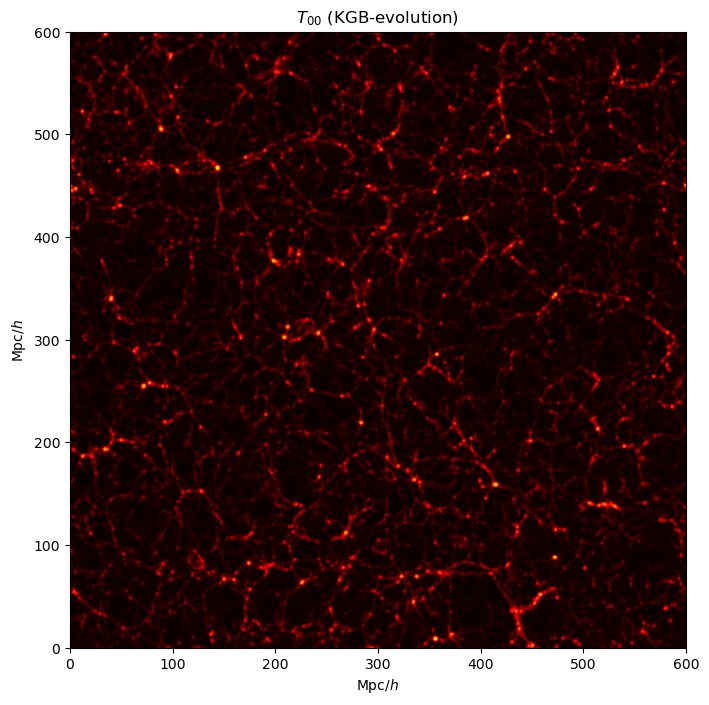

In [76]:
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 8), sharey="row", sharex="col")
plt.subplots_adjust(hspace=0.15, wspace=0.08)

import matplotlib.colors as colors
 
zi_KGB = snapshot_KGB[0:Ngrid, 0:Ngrid, 20]

zi_KGB = zi_KGB+1

cax = ax2.imshow(
    zi_KGB,
    cmap=get_cmap(cmap),
    origin="lower",
    extent=[x, x + dx, y, y + dy],
    interpolation="bicubic",
    norm=LogNorm(vmin=1, vmax=300),
)

cbar = fig.colorbar(cax)
cbar.set_label(r"$\rho/\bar{\rho}$", fontsize=20)

ax2.set_title(r"$T_{00}}$ (KGB-evolution)")

ax2.set_xlabel("Mpc/$h$")
ax2.set_ylabel("Mpc/$h$")

In [62]:
zi_KGB.max()

425.315987123013

In [141]:
rho_total =  1.239059e-08 + 2.267732e-09 
H0_hiclass = 2.221335e-04 

rho_gev = rho_total / (H0_hiclass**2) 

In [142]:
rho_gev

0.297068182090564

In [22]:
T00_KGB[0:Ngrid, 0:Ngrid, 20]

(512, 512)

# Gadget2

In [12]:
import numpy as np
import MAS_library as MASL
import plotting_library as PL
import readgadget
from pylab import *
from matplotlib.colors import LogNorm

In [13]:
snapshot = '../data/512-600Mpc/snap_000_cdm'
#snapshot = '/home/ahmad/kgb-master/imp/snap_000_cdm'

#snapshot = '/home/ahmad/gevolution-1.2/output/lcdm_snap000_cdm'

grid     = 512   #the density field will have grid^3 voxels
MAS      = 'CIC'  #Mass-assignment scheme:'NGP', 'CIC', 'TSC', 'PCS'
verbose  = True   #whether to print information about the progress
ptypes    = [1]    #[1](CDM), [2](neutrinos) or [1,2](CDM+neutrinos)
plane        = 'XY'  #'XY','YZ' or 'XZ'
save_df      = True  #whether save the density field into a file

# read header
header   = readgadget.header(snapshot)
BoxSize  = header.boxsize/1e3  #Mpc/h
redshift = header.redshift     #redshift of the snapshot
Masses   = header.massarr*1e10 #Masses of the particles in Msun/h
filenum  = header.filenum

# read positions, velocities and IDs of the particles
pos = readgadget.read_block(snapshot, "POS ", ptypes)/1e3 #positions in Mpc/h

print('BoxSize: %.3f Mpc/h'%BoxSize)
print('Redshift: %.3f'%redshift)
print('%.3f < X < %.3f'%(np.min(pos[:,0]), np.max(pos[:,0])))
print('%.3f < Y < %.3f'%(np.min(pos[:,1]), np.max(pos[:,1])))
print('%.3f < Z < %.3f'%(np.min(pos[:,2]), np.max(pos[:,2])))

BoxSize: 600.000 Mpc/h
Redshift: 0.000
0.000 < X < 600.000
0.000 < Y < 600.000
0.000 < Z < 600.000



Density field already computed. Reading it from file...

Creating the figure...


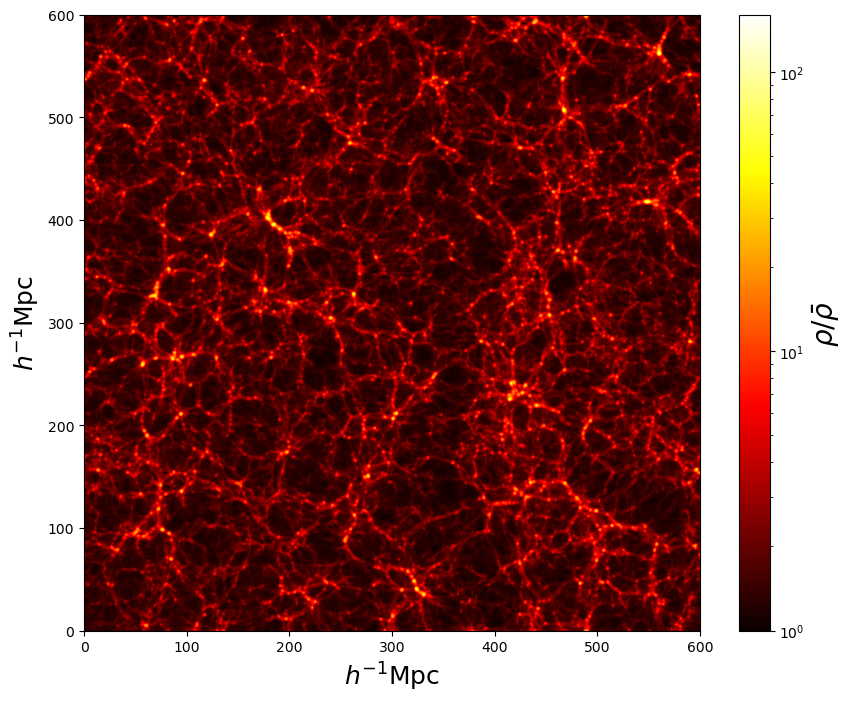

In [15]:
x_min, x_max = 0.0, 600.0
y_min, y_max = 0.0, 600.0
z_min, z_max = 0.0, 20.0


# compute 2D overdensity field
dx, x, dy, y, overdensity = PL.density_field_2D(snapshot, x_min, x_max, y_min, y_max,
                                                z_min, z_max, grid, ptypes, plane, MAS, save_df)

# image parameters
fout = "Image.png"
overdensity = overdensity+1
# min_overdensity = 0.5  # minimum overdensity to plot
# max_overdensity = 100.0  # maximum overdensity to plot

min_overdensity = np.min(overdensity)
max_overdensity = np.max(overdensity)

scale = "log"  #'linear' or 'log'
cmap = "hot"




print("\nCreating the figure...")
fig = figure(figsize=(10, 8))  # create the figure
ax1 = fig.add_subplot(111)

ax1.set_xlim([x, x + dx])  # set the range for the x-axis
ax1.set_ylim([y, y + dy])  # set the range for the y-axis

ax1.set_xlabel(r"$h^{-1}{\rm Mpc}$", fontsize=18)  # x-axis label
ax1.set_ylabel(r"$h^{-1}{\rm Mpc}$", fontsize=18)  # y-axis label


# min_overdensity = np.min(overdensity)
# max_overdensity = np.max(overdensity)

#overdensity[np.where(overdensity < min_overdensity)] = min_overdensity

if scale == "linear":
    cax = ax1.imshow(
        overdensity,
        cmap=get_cmap(cmap),
        origin="lower",
        extent=[x, x + dx, y, y + dy],
        interpolation="bicubic",
        vmin=min_overdensity,
        vmax=max_overdensity,
    )
else:
    cax = ax1.imshow(
        overdensity,
        cmap=get_cmap(cmap),
        origin="lower",
        extent=[x, x + dx, y, y + dy],
        interpolation="bicubic",
        norm=LogNorm(vmin=min_overdensity, vmax=max_overdensity),
    )

cbar = fig.colorbar(cax)
cbar.set_label(r"$\rho/\bar{\rho}$", fontsize=20)

In [78]:
overdensity

array([[0.33502895, 0.69239527, 0.5854406 , ..., 0.3165503 , 0.532052  ,
        0.43818063],
       [0.46220165, 0.16454312, 0.41002002, ..., 0.5322134 , 0.34814805,
        0.34838676],
       [0.36989585, 0.33343604, 0.4169736 , ..., 0.34369197, 0.17544986,
        0.3398606 ],
       ...,
       [0.51207864, 0.43479398, 0.6896561 , ..., 0.37307584, 0.30737185,
        0.29105884],
       [0.50652695, 0.39644328, 0.84209675, ..., 0.2957893 , 0.240689  ,
        0.23088041],
       [0.6210511 , 0.8650778 , 1.3220545 , ..., 0.262328  , 0.4775295 ,
        0.3259603 ]], dtype=float32)

In [87]:
delta_2D.T

array([[0.36544222, 0.41191578, 0.31779844, ..., 0.9497326 , 1.1629865 ,
        5.4186096 ],
       [0.36464304, 0.4051707 , 0.3901566 , ..., 0.62335736, 1.2076882 ,
        3.1686535 ],
       [0.35717404, 0.33945274, 0.3257858 , ..., 0.49408922, 0.6846556 ,
        1.9017956 ],
       ...,
       [0.98002017, 1.7530537 , 1.48854   , ..., 0.95300657, 0.7301713 ,
        1.8512025 ],
       [0.7181475 , 0.69405264, 1.0178763 , ..., 0.6945947 , 0.6939603 ,
        0.96035707],
       [0.49513674, 0.6441822 , 0.84038866, ..., 1.225704  , 0.95439076,
        1.1224711 ]], dtype=float32)

# Second way

In [85]:
#snapshot = '../data/512-600Mpc/snap_000_cdm'

grid     = 512   #the density field will have grid^3 voxels
MAS      = 'CIC'  #Mass-assignment scheme:'NGP', 'CIC', 'TSC', 'PCS'
verbose  = True   #whether to print information about the progress
do_RSD   = False                   #dont do redshif-space distortions
ptypes    = [1]    #[1](CDM), [2](neutrinos) or [1,2](CDM+neutrinos)
plane        = 'XY'  #'XY','YZ' or 'XZ'
save_df      = True  #whether save the density field into a file

delta = MASL.density_field_gadget(snapshot, ptypes, grid, MAS, do_RSD, axis, verbose)

delta /= np.mean(delta, dtype=np.float64); 


Computing density field of particles [1]
1.34217728e+08 should be equal to
1.34217728e+08
Time taken = 5.24 seconds



Computing density field of particles [1]
1.34217721e+08 should be equal to
1.34217728e+08
Time taken = 3.15 seconds
Cell size: 9.37500 Mpc/h
Grid indices:
  X: 0 to 53
  Y: 0 to 53
  Z: 0 to 2


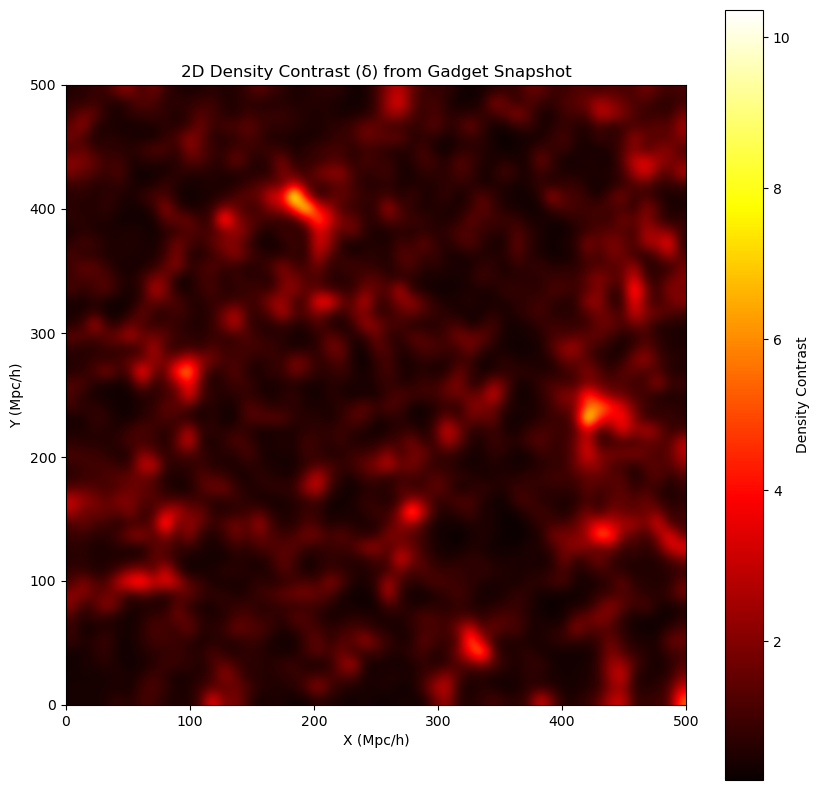

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# --- Parameters ---
# File and grid parameters for the Gadget snapshot
#snapshot = '../data/512-600Mpc/snap_000_cdm'
grid =64                    # The density field is on a grid^3 array
MAS = 'CIC'                   # Mass-assignment scheme
verbose = True                # Verbosity flag
do_RSD = False                # Do not apply redshift-space distortions
ptypes = [1]                  # Particle type to use
axis = None                   # (if needed, set appropriate axis; here assumed not used)



# Plotting parameters
min_overdensity = 0.5         # Minimum overdensity for the log scale
max_overdensity = 100.0       # Maximum overdensity for the log scale
cmap = 'hot'                # Colormap for the plot

# --- Step 1: Calculate the 3D Density Contrast Field ---
# Here, we assume that MASL.density_field_gadget returns a 3D field (shape: grid x grid x grid)
# and that the output is in absolute density. We then normalize to obtain delta = (density/mean - 1)
delta = MASL.density_field_gadget(snapshot, ptypes, grid, MAS, do_RSD, axis, verbose)
delta = delta / np.mean(delta, dtype=np.float64) 

# --- Step 2: Map Physical Limits to Grid Indices ---
# Here we assume that the simulation box is 600 Mpc/h on a side.
# If your Gadget snapshot box size is different, adjust 'box_size' accordingly.

cell_size = BoxSize / grid
print("Cell size: {:.5f} Mpc/h".format(cell_size))

# Compute grid indices corresponding to the physical limits.
x_min_idx = int(x_min / cell_size)
x_max_idx = int(x_max / cell_size)
y_min_idx = int(y_min / cell_size)
y_max_idx = int(y_max / cell_size)
z_min_idx = int(z_min / cell_size)
z_max_idx = int(z_max / cell_size)

print("Grid indices:")
print("  X: {} to {}".format(x_min_idx, x_max_idx))
print("  Y: {} to {}".format(y_min_idx, y_max_idx))
print("  Z: {} to {}".format(z_min_idx, z_max_idx))

# --- Step 3: Extract and Project the 3D Field ---
# Slice out the region of interest.
delta_slice = delta[x_min_idx:x_max_idx, y_min_idx:y_max_idx, z_min_idx:z_max_idx]

# Project the 3D subregion into 2D by averaging over the z-direction.
delta_2D = np.mean(delta_slice, axis=2)

# --- Step 4: Plot the 2D Density Contrast ---
extent = [x_min, x_max, y_min, y_max]  # physical extents for the x and y axes

fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(
    delta_2D.T,              # transpose for proper orientation (x and y are swapped in imshow)
    cmap=cmap,
    origin="lower",
    extent=extent,
    interpolation="bicubic",
)
ax.set_xlabel("X (Mpc/h)")
ax.set_ylabel("Y (Mpc/h)")
ax.set_title("2D Density Contrast (δ) from Gadget Snapshot")
fig.colorbar(cax, ax=ax, label="Density Contrast")
plt.show()


In [16]:
import numpy as np
import MAS_library as MASL

# number of particles
Np = 256**2

# density field parameters
grid    = 256    #the 2D field will have grid x grid pixels
BoxSize = 1000.0 #Mpc/h ; size of box
MAS     = 'TSC'  #mass-assigment scheme
verbose = True   #print information on progress

# particle positions in 2D
pos = np.random.random((Np,2)).astype(np.float32)*BoxSize

# define 2D density field
delta = np.zeros((grid,grid), dtype=np.float32)

# construct 2D density field
MASL.MA(pos, delta, BoxSize, MAS, verbose=verbose)

# at this point, delta contains the effective number of particles in each pixel
# now compute overdensity and density constrast
delta /= np.mean(delta, dtype=np.float64);


Using TSC mass assignment scheme
Time taken = 0.003 seconds



In [17]:
delta

array([[2.1495278 , 1.4516095 , 1.1359496 , ..., 1.1210598 , 1.3409523 ,
        2.5662243 ],
       [0.8431905 , 0.6767156 , 0.81559205, ..., 1.1539804 , 0.438262  ,
        0.9018519 ],
       [1.137449  , 0.9264268 , 1.6284889 , ..., 0.8386027 , 0.58796847,
        0.573415  ],
       ...,
       [0.43901262, 0.91340584, 1.9682212 , ..., 0.8144055 , 0.2411614 ,
        0.42771316],
       [1.1014055 , 0.7058275 , 1.766385  , ..., 0.07898912, 1.0104321 ,
        0.86370486],
       [1.5729965 , 0.82870173, 0.7031119 , ..., 0.28935188, 0.87728983,
        2.0052812 ]], dtype=float32)

In [125]:
# the sum of the values in all voxels should be equal to the number of particles
print('%.3f should be equal to\n%.3f'%(np.sum(delta, dtype=np.float64), pos.shape[0]))

134217727.951 should be equal to
134217728.000


In [126]:
delta *= Masses[1]

# now check that the mass in the density field is equal to the total mass in the simulation
print('%.3e should be equal to\n%.3e'%(np.sum(delta, dtype=np.float64), pos.shape[0]*Masses[1]))

1.870e+19 should be equal to
1.870e+19


Image shape: (512, 512)
0.000e+00 < mass < 5.247e+13
0.000 < X < 10.000
0.000 < Y < 600.000
0.000 < Z < 600.000


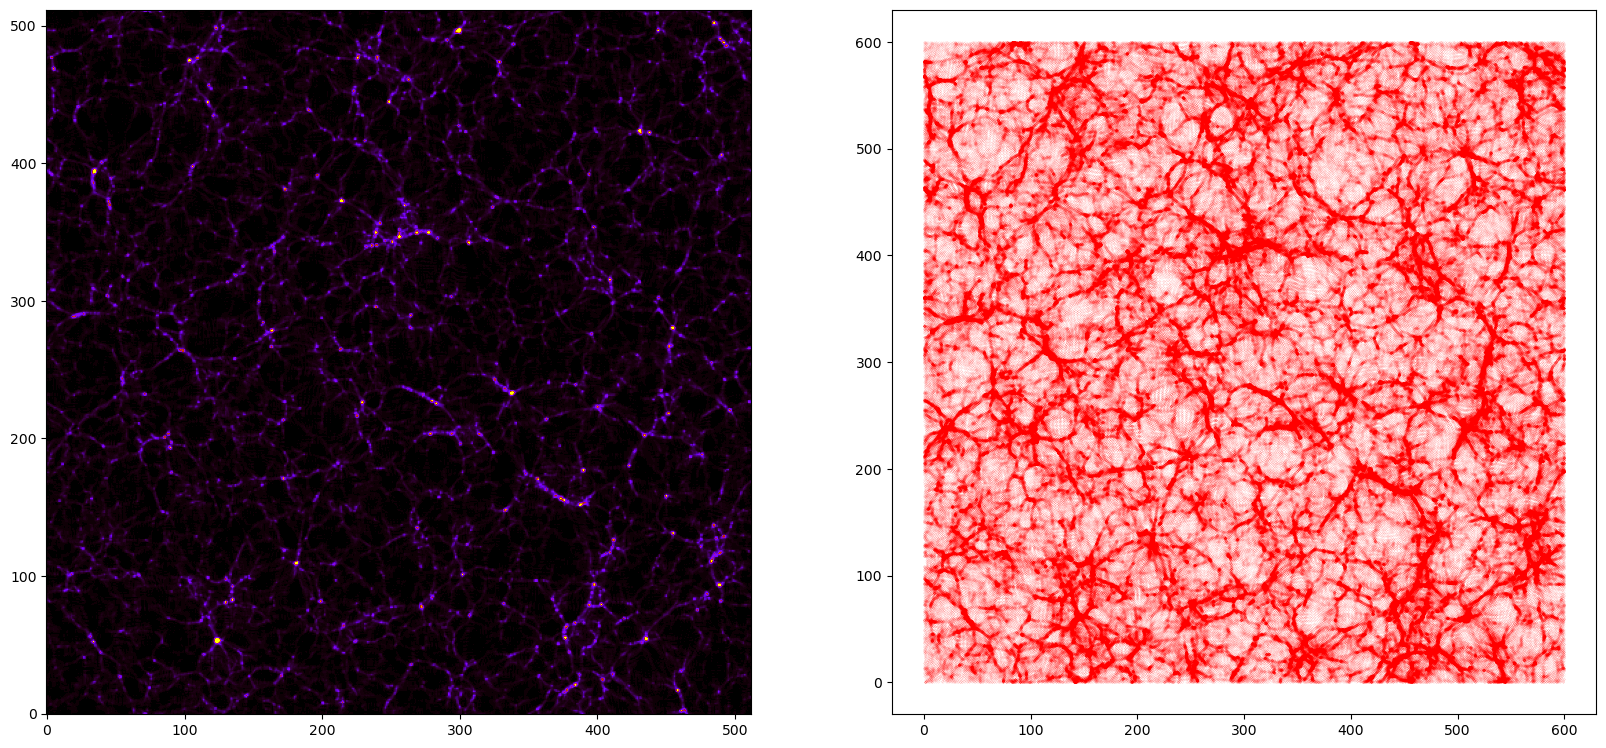

In [127]:
# the box is 1000 Mpc/h and every voxel has ~2 Mpc/h size. We can take ~5 slices to consider a region with a ~10 Mpc/h witdh
mean_density = np.mean(delta[:5,:,:],axis=0) #Take the first 5 component along the first axis and compute the mean value
print('Image shape:',mean_density.shape)
print('%.3e < mass < %.3e'%(np.min(mean_density), np.max(mean_density)))

# now lets consider the particles in that slide
indexes = np.where((pos[:,0]<10))
pos_slide = pos[indexes]
print('%.3f < X < %.3f'%(np.min(pos_slide[:,0]), np.max(pos_slide[:,0])))
print('%.3f < Y < %.3f'%(np.min(pos_slide[:,1]), np.max(pos_slide[:,1])))
print('%.3f < Z < %.3f'%(np.min(pos_slide[:,2]), np.max(pos_slide[:,2])))

import matplotlib.pyplot as plt
from pylab import *
fig = figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax2.set_aspect('equal')
ax1.imshow(mean_density.T, cmap='gnuplot',vmin=0.0, vmax=1e13, origin='lower')
ax2.scatter(pos_slide[:,1], pos_slide[:,2], s=0.001,c='r')
plt.show()

In [85]:
mean_density.T

array([[1.6697436e+10, 3.2493601e+10, 4.1960722e+10, ..., 3.0947594e+10,
        6.8219136e+09, 3.8878052e+10],
       [2.9397837e+09, 2.6914548e+10, 5.0545590e+10, ..., 2.5714821e+10,
        5.1270487e+09, 2.0897153e+10],
       [2.6502599e+10, 1.0115747e+10, 2.0520507e+10, ..., 4.8095871e+10,
        3.9156498e+09, 4.8677069e+09],
       ...,
       [1.3062766e+10, 1.1541072e+10, 1.9665340e+10, ..., 1.0620087e+10,
        2.9609734e+10, 1.8109739e+10],
       [3.4915176e+10, 1.9871191e+10, 2.2635440e+10, ..., 1.0390620e+10,
        2.9080228e+10, 1.2974072e+10],
       [1.9231048e+10, 3.5918496e+10, 2.0699068e+10, ..., 2.1206839e+10,
        1.6311527e+10, 1.9705321e+10]], dtype=float32)

In [142]:
grid     = 512                     #grid size
ptypes   = [1]                   #CDM + neutrinos
MAS      = 'CIC'                   #Cloud-in-Cell
do_RSD   = False                   #dont do redshif-space distortions
axis     = 0                       #axis along which place RSD; not used here
verbose  = True   #whether print information on the progress

# Compute the effective number of particles/mass in each voxel
density = MASL.density_field_gadget(snapshot, ptypes, grid, MAS, do_RSD, axis, verbose)

# # compute density contrast: delta = rho/<rho> - 1
delta = density - np.mean(density, dtype=np.float64) 


Computing density field of particles [1]
1.34217728e+08 should be equal to
1.34217728e+08
Time taken = 10.52 seconds


In [143]:
T00_KGB_file = []

for file in os.walk(f"./../{folder_name_kgb}"):
    for el in file[2]:
        if el.endswith("_T00.h5"):
            T00_KGB_file.append(el)
            T00_KGB_file.sort()
            
            
snapshot_KGB = []

for el in T00_KGB_file:
    f = h5py.File(os.path.join(f"./../{folder_name_kgb}", el), "r")
    snapshot_KGB.append(f["data"])

In [144]:
density_plot_KGB = snapshot_KGB[0]

delta_gadget = np.mean(delta[:5, :, :], axis=0)
density_region_KGB = np.mean(density_plot_KGB[:5, :, :], axis=0)

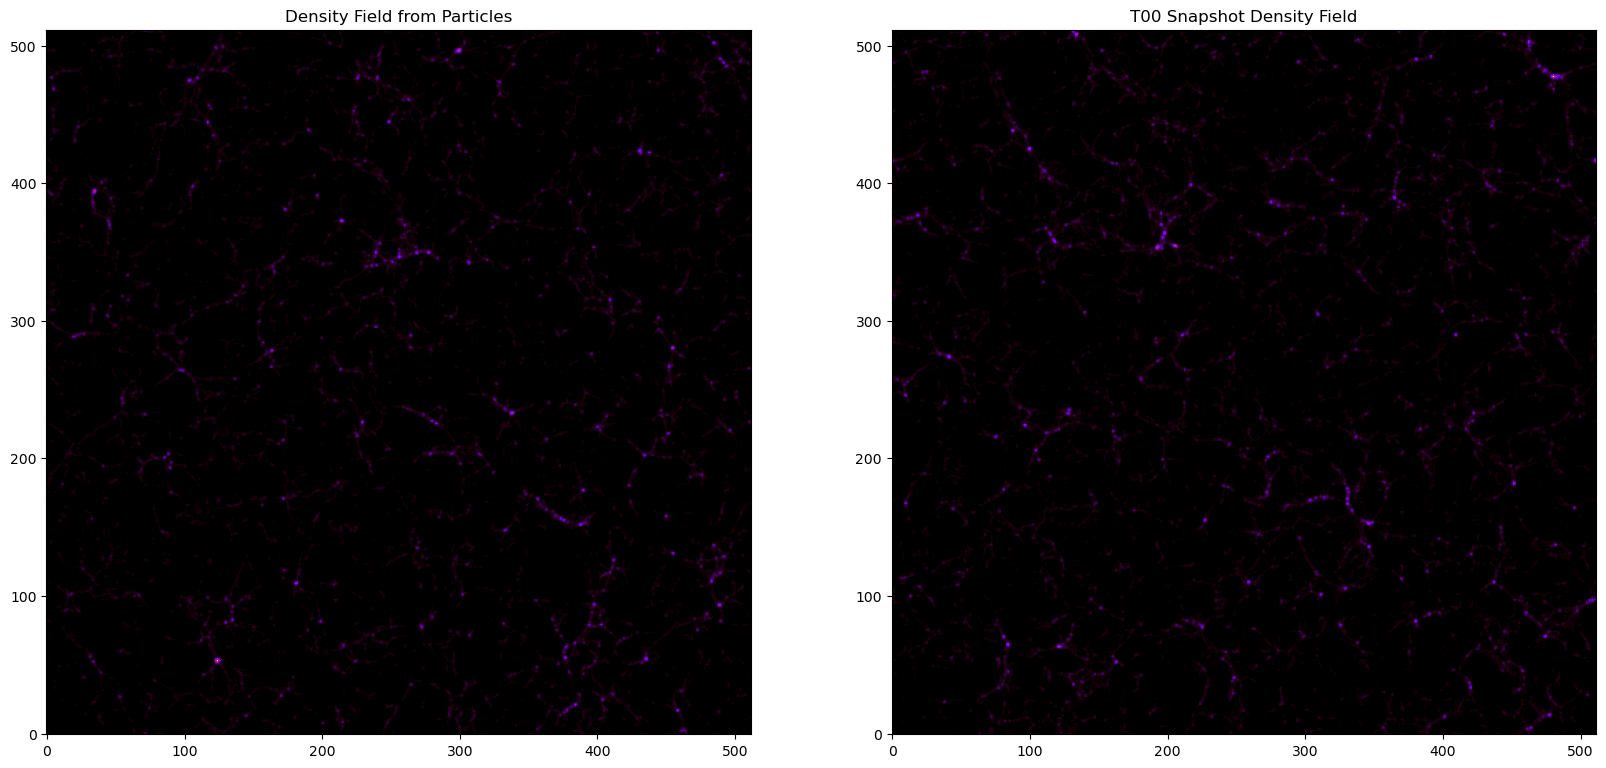

In [145]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Particle-based density field (assuming mean_density was calculated as before)
ax1.imshow(delta_gadget.T, cmap='gnuplot', origin='lower')
ax1.set_title("Density Field from Particles")

# T00 density field for the same region
ax2.imshow(density_region_KGB.T, cmap='gnuplot', origin='lower')
ax2.set_title("T00 Snapshot Density Field")

plt.show()


In [106]:
Ngrid

512

In [1]:
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 8), sharey="row", sharex="col")
plt.subplots_adjust(hspace=0.15, wspace=0.08)

import matplotlib.colors as colors

boxsize = 600
Ngrid = 512


density_plot_KGB = snapshot_KGB[0]

xi, yi = np.mgrid[0:Ngrid, 0:Ngrid] 
zi_KGB = density_plot_KGB[0:Ngrid, 0:Ngrid, 20]


DM_KGB = ax2.pcolormesh(
    boxsize / Ngrid * xi,
    boxsize / Ngrid * yi,
    zi_KGB.reshape(xi.shape),
    cmap="binary",
    shading="gouraud",
    norm=colors.PowerNorm(gamma=0.3),
)

cbar_KGB = plt.colorbar(DM_KGB, ax=ax2, orientation="vertical",pad=0.02)




ax2.set_title(r"$T_{00}}$ (KGB-evolution)")

ax2.set_xlabel("Mpc/$h$")
ax2.set_ylabel("Mpc/$h$")

NameError: name 'plt' is not defined


Computing density field...
Expected mass = 6.4650315e+17
Computed mass = 6.4650553e+17
mass density = 8.65801e+10
0.013403457 < rho/<rho> < 122.46926


Text(0, 0.5, 'Mpc/$h$')

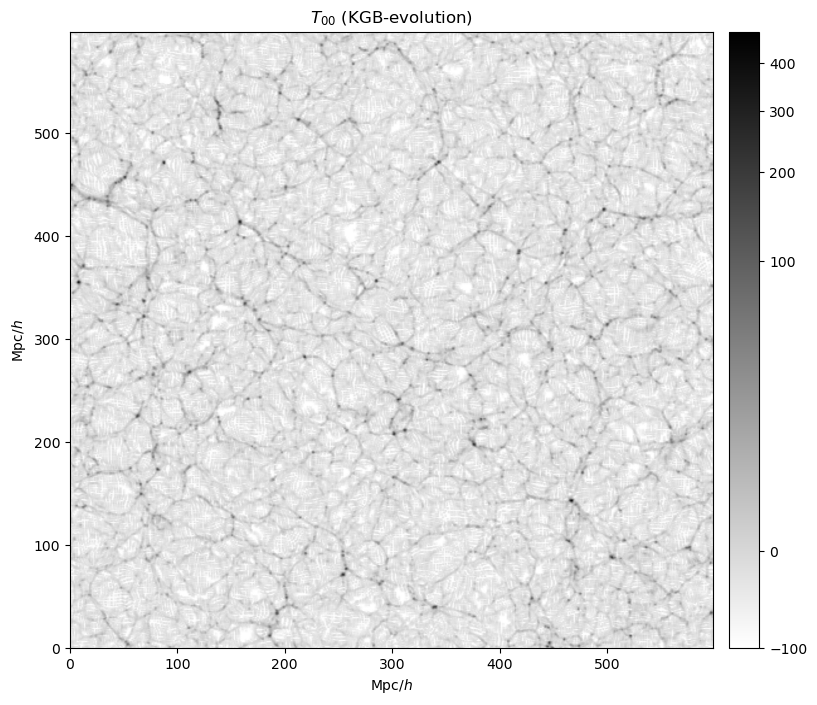

In [72]:
# density field parameters
x_min, x_max = 0.0, 600.0
y_min, y_max = 0.0, 600.0
z_min, z_max = 0.0, 20.0
grid         = 512
ptypes       = [1]   # 0-Gas, 1-CDM, 2-NU, 4-Stars; can deal with several species
plane        = 'XY'  #'XY','YZ' or 'XZ'
MAS          = 'PCS' #'NGP', 'CIC', 'TSC', 'PCS'
save_df      = True  #whether save the density field into a file

# image parameters
fout            = 'Image.png'
min_overdensity = 0.5      #minimum overdensity to plot
max_overdensity = 50.0    #maximum overdensity to plot
scale           = 'linear' #'linear' or 'log'
cmap            = 'hot'


# compute 2D overdensity field
dx, x, dy, y, overdensity = PL.density_field_2D(snapshot, x_min, x_max, y_min, y_max,
                                                z_min, z_max, grid, ptypes, plane, MAS, save_df)



fig2, ax2 = plt.subplots(1, 1, figsize=(10, 8), sharey="row", sharex="col")
plt.subplots_adjust(hspace=0.15, wspace=0.08)

import matplotlib.colors as colors

boxsize = 600
Ngrid = 512


density_plot_KGB = snapshot_KGB[0]

xi, yi = np.mgrid[0:Ngrid, 0:Ngrid] 
zi_KGB = delta[0:Ngrid, 0:Ngrid, 20]


DM_KGB = ax2.pcolormesh(
    boxsize / Ngrid * xi,
    boxsize / Ngrid * yi,
    zi_KGB.reshape(xi.shape),
    cmap="binary",
    shading="gouraud",
    norm=colors.PowerNorm(gamma=0.3),
)

cbar_KGB = plt.colorbar(DM_KGB, ax=ax2, orientation="vertical",pad=0.02)




ax2.set_title(r"$T_{00}}$ (KGB-evolution)")

ax2.set_xlabel("Mpc/$h$")
ax2.set_ylabel("Mpc/$h$")

In [11]:
import numpy as np
import plotting_library as PL
from pylab import *
from matplotlib.colors import LogNorm

#snapshot name
snapshot = '../data/512-600Mpc/snap_000_cdm'

# density field parameters
x_min, x_max = 0.0, 600.0
y_min, y_max = 0.0, 600.0
z_min, z_max = 0.0, 20.0
grid         = 512
ptypes       = [1]   # 0-Gas, 1-CDM, 2-NU, 4-Stars; can deal with several species
plane        = 'XY'  #'XY','YZ' or 'XZ'
MAS          = 'CIC' #'NGP', 'CIC', 'TSC', 'PCS'
save_df      = True  #whether save the density field into a file

# image parameters
fout            = 'Image.png'
min_overdensity = 0.5      #minimum overdensity to plot
max_overdensity = 50.0    #maximum overdensity to plot
scale           = 'log' #'linear' or 'log'
cmap            = 'hot'


# compute 2D overdensity field
dx, x, dy, y, overdensity = PL.density_field_2D(snapshot, x_min, x_max, y_min, y_max,
                                                z_min, z_max, grid, ptypes, plane, MAS, save_df)


# plot density field
print('\nCreating the figure...')
fig = figure()    #create the figure
ax1 = fig.add_subplot(111)

ax1.set_xlim([x, x+dx])  #set the range for the x-axis
ax1.set_ylim([y, y+dy])  #set the range for the y-axis

ax1.set_xlabel(r'$h^{-1}{\rm Mpc}$',fontsize=18)  #x-axis label
ax1.set_ylabel(r'$h^{-1}{\rm Mpc}$',fontsize=18)  #y-axis label

if min_overdensity==None:  min_overdensity = np.min(overdensity)
if max_overdensity==None:  max_overdensity = np.max(overdensity)

overdensity[np.where(overdensity<min_overdensity)] = min_overdensity

if scale=='linear':
      cax = ax1.imshow(overdensity,cmap=get_cmap(cmap),origin='lower',
                       extent=[x, x+dx, y, y+dy], interpolation='bicubic',
                       vmin=min_overdensity,vmax=max_overdensity)
else:
      cax = ax1.imshow(overdensity,cmap=get_cmap(cmap),origin='lower',
                       extent=[x, x+dx, y, y+dy], interpolation='bicubic',
                       norm = LogNorm(vmin=min_overdensity,vmax=max_overdensity))

cbar = fig.colorbar(cax)
cbar.set_label(r"$\rho/\bar{\rho}$",fontsize=20)
savefig(fout, bbox_inches='tight')
close(fig)



Computing density field...
Expected mass = 6.4650315e+17
Computed mass = 6.4650597e+17
mass density = 8.65801e+10
0.0 < rho/<rho> < 159.39082

Creating the figure...


In [12]:
1

1

# Snapshots Analysis

In [3]:
import os, sys, warnings
import h5py
import matplotlib.colors as colors
from configparser import ConfigParser
from itertools import chain


# folder_name_kev = '/home/ahmad/Desktop/cluster/Baobab/1200-100Mpc'
folder_name_kev = '/home/ahmad/kgb-master/data/snapshot0-kess'
folder_name_kgb = '/home/ahmad/kgb-master/data/snapshots'


# folder_name_kev = '/home/ahmad/k-evolution_devel-k-evolution-/imp'
# folder_name_kgb = 'imp'

parser = ConfigParser()
with open(f"{folder_name_kgb}/file_classparameters.ini") as lines:
    lines = chain(("[top]",), lines) # This line produce a fake section header called top
    parser.read_file(lines)

h = float(parser.get("top", "h"))
Omega_b = float(parser.get("top", "Omega_b"))
Omega_cdm = float(parser.get("top", "Omega_cdm"))
#m_ncdm = float(parser.get("top", "m_ncdm"))
n_s = float(parser.get("top", "n_s"))
A_s = float(parser.get("top", "A_s"))
gravity_model = (parser.get("top", "gravity_model"))

#Omega_smg = float(parser.get("top", "Omega_smg"))
Omega_Lambda = float(parser.get("top", "Omega_Lambda"))
Omega_fld = float(parser.get("top", "Omega_fld"))

# Extract and parse the 'parameters_smg' string
parameters_smg_str = parser.get("top", "parameters_smg")
parameters_smg_list = parameters_smg_str.split(',')



if len(parameters_smg_list) < 2:
    raise ValueError("parameters_smg must contain at least two values: alpha_k and alpha_b.")

# Convert the first two parameters to floats
alpha_K_hat = float(parameters_smg_list[0].strip())
alpha_B_hat = float(parameters_smg_list[1].strip())


# Extract and parse the 'parameters_smg' string
expansion_smg_str = parser.get("top", "expansion_smg")
expansion_smg_list = expansion_smg_str.split(',')

Omega_smg = float(expansion_smg_list[0].strip())
w0 = float(expansion_smg_list[1].strip())
wa = float(expansion_smg_list[2].strip())

# Function to format numbers for LaTeX (reusing the previous function)
def format_scientific_latex(number):
    mantissa, exponent = f"{number:.1e}".split('e')
    exponent = exponent.lstrip('+').lstrip('0') or '0'
    return f"{mantissa} \\times 10^{{{exponent}}}"

# Format the alpha values
alpha_K_hat_latex = format_scientific_latex(alpha_K_hat)

# reading the redshifts

z = []

with open(f'{folder_name_kgb}/file_settings_used.ini', 'r') as f:
    for line in f:
        if line.startswith('Pk redshifts'):
            # Extract the part after '=' and split by commas
            redshifts_string = line.split('=')[1].split('#')[0].strip()  # Remove comments after #
            z = [float(x.strip()) for x in redshifts_string.split(',')]  # Parse as floats
            
with open(f"{folder_name_kgb}/file_settings_used.ini") as lines:
    lines = chain(("[top]",), lines) # This line produce a fake section header called top
    parser.read_file(lines)


boxsize = float(parser.get("top", "boxsize"))
Ngrid = float(parser.get("top", "Ngrid"))

k_nyq = np.pi*Ngrid/boxsize

#nKe_numsteps   = float(parser.get("top", "nKe_numsteps"))
Courant_factor = float(parser.get("top", "Courant factor"))

redshifts = z



for i in range(np.shape(redshifts)[0]):
    # Format `i` to ensure filenames are correct
    file_index = str(i).zfill(2)  # Pads with one leading zero if `i` is a single digit
    
    # Load data using the formatted `file_index`
    data_kgb["kgb"]["pi"]["z=" + str(redshifts[i])] = np.loadtxt(
        f"{folder_name_kgb}/pk_0{file_index}_pi_k.dat"
    )

    kk_kgb = data_kgb["kgb"]["pi"]["z=" + str(redshifts[i])][:, 0]
    
#     data_kev["kev"]["pi"]["z=" + str(redshifts[i])] = np.loadtxt(
#         f"./../{folder_name_kev}/pk_0{file_index}_pi_k.dat"
#     )

#     kk_kev = data_kev["kev"]["pi"]["z=" + str(redshifts[i])][:, 0]


colors = sns.color_palette("gist_ncar", 16).as_hex()

In [4]:
Ngrid

1200.0

## KGB

In [5]:
T00_KGB_file = []

for file in os.walk(f"{folder_name_kgb}"):
    for el in file[2]:
#         if el.endswith("_T00.h5"):
#             T00_KGB_file.append(el)
#             T00_KGB_file.sort()
        if el.endswith("3_T00_kgb.h5"):
            T00_KGB_file.append(el)
            T00_KGB_file.sort()
            
            
snapshot_KGB = []

for el in T00_KGB_file:
    f = h5py.File(os.path.join(f"{folder_name_kgb}", el), "r")
    snapshot_KGB.append(f["data"])

## K-essence

In [6]:
T00_kess_file = []


for file in os.walk(folder_name_kev):
    for el in file[2]:
#         if el.endswith("_T00.h5"):
#             T00_kess_file.append(el)
#             T00_kess_file.sort()
        if el.endswith("3_T00_kgb.h5"):
            T00_kess_file.append(el)
            T00_kess_file.sort()
            
            
snapshot_kess = []

for el in T00_kess_file:
    f = h5py.File(os.path.join(folder_name_kev, el), "r")
    snapshot_kess.append(f["data"])

In [8]:
snapshot_KGB[0]

<HDF5 dataset "data": shape (1200, 1200, 1200), type "<f8">

In [27]:
np.mean(snapshot_kess[0]['data'])

ValueError: Field names only allowed for compound types

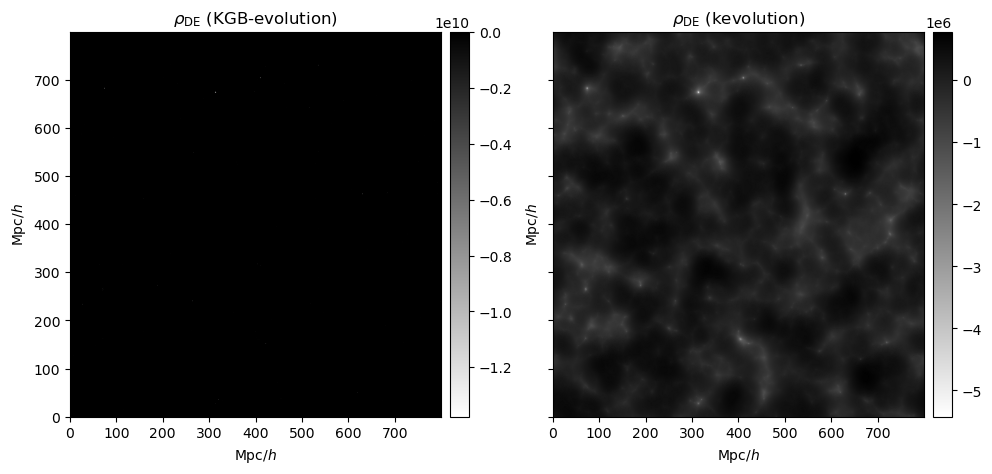

In [20]:
fig2, ax2 = plt.subplots(1, 2, figsize=(12, 5), sharey="row", sharex="col")
plt.subplots_adjust(hspace=0.15, wspace=0.08)

import matplotlib.colors as colors

boxsize = 800
Ngrid = 1200

# vmin_DE = -1.5
# vmax_DE = 1.2

for i in range(len(snapshot_kess)):

    density_plot_KGB = snapshot_KGB[i]
    mean_KGB  = np.mean(density_plot_KGB)

    density_plot_kess = snapshot_kess[i]
    mean_kess  = np.mean(density_plot_kess)

    xi, yi = np.mgrid[0:Ngrid, 0:Ngrid]
    
    zi_KGB = density_plot_KGB[0:Ngrid, 0:Ngrid, 20]/ mean_KGB + 2
    zi_kess = density_plot_kess[0:Ngrid, 0:Ngrid, 20]/ mean_kess + 2


#     if i == 0:
        
    DE_KGB = ax2[i].pcolormesh(
        boxsize / Ngrid * xi,
        boxsize / Ngrid * yi,
        zi_KGB.reshape(xi.shape),
        cmap="binary",
        shading="gouraud",
        #norm=colors.PowerNorm(gamma=0.5),
    )

    cbar_KGB = plt.colorbar(DE_KGB, ax=ax2[0], orientation="vertical",pad=0.02)




#     else:
#         pass
    DE_kess = ax2[1].pcolormesh(
        boxsize / Ngrid * xi,
        boxsize / Ngrid * yi,
        zi_kess.reshape(xi.shape),
        cmap="binary",
        shading="gouraud",
        #norm=colors.PowerNorm(gamma=0.5),
    )

    cbar_KGB = plt.colorbar(DE_kess, ax=ax2[1], orientation="vertical", pad=0.02)





ax2[0].set_title(r"$\rho_\mathrm{DE}$ (KGB-evolution)")
ax2[1].set_title(r"$\rho_\mathrm{DE}$ (kevolution)")


        

for i in range (0,2):
    ax2[i].set_xlabel("Mpc/$h$")
    ax2[i].set_ylabel("Mpc/$h$")

    


In [13]:
import h5py

snap_path_kgb = "/home/ahmad/kgb-master/data/snapshots/"
snap_path_kess = "/home/ahmad/kgb-master/data/snapshots/"

import h5py
import glob

# Define filename patterns for dark energy and matter snapshots
dark_kgb = snap_path_kgb +'/snap_*3_T00_kgb.h5'
dark_kess = snap_path_kess+ '/snap_*3_T00_kgb.h5'

# Collect and sort matching file paths
dark_files_kgb = sorted(glob.glob(dark_kgb))
dark_files_kess = sorted(glob.glob(dark_kess))


# Open HDF5 files and store file objects in separate lists
dark_snapshots_kgb = [h5py.File(f, 'r') for f in dark_files_kgb]
dark_snapshots_kess = [h5py.File(f, 'r') for f in dark_files_kess]

# Example: Access a dataset from the first dark energy snapshot
# coords_dark = dark_snapshots[0]['PartType1/Coordinates'][:]
# coords_matter = matter_snapshots[0]['PartType1/Coordinates'][:]

# When you're done processing, remember to close all files:
# for f in dark_snapshots + matter_snapshots:
#     f.close()

print("Dark energy kgb files loaded:", dark_files_kgb)
print("Dark energy kess files loaded:", dark_files_kess)

Dark energy kgb files loaded: ['/home/ahmad/kgb-master/data/snapshots/snap_003_T00_kgb.h5']
Dark energy kess files loaded: ['/home/ahmad/kgb-master/data/snapshots/snap_003_T00_kgb.h5']


NameError: name 'rho_smg_f' is not defined

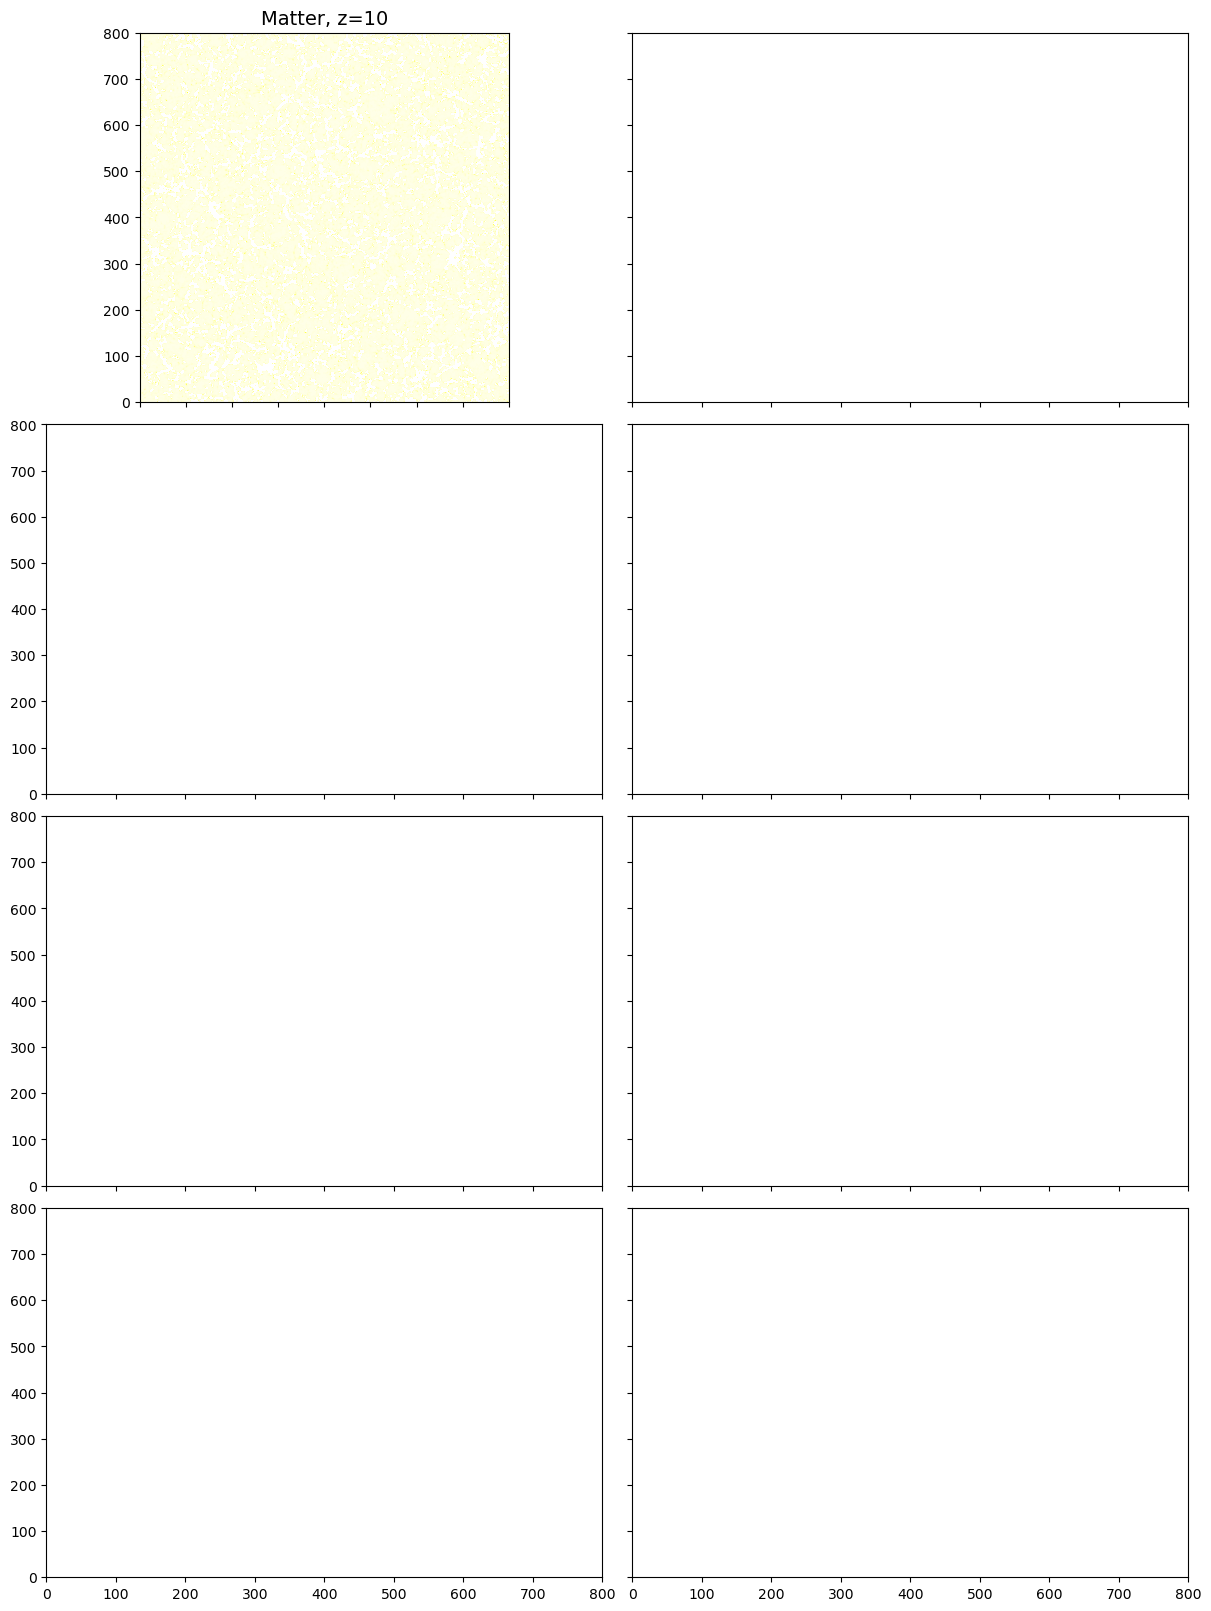

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.cm     import get_cmap

# --- parameters ---
Ngrid     = 1200
boxsize   = 800
cmap      = "hot"
cmap_de   = "jet"
redshifts = [10, 5, 2, 0.08]   

fig, axes = plt.subplots(
    nrows=4, ncols=2, figsize=(12, 4*4),
    sharex=True, sharey=True,
    constrained_layout=True
)

for i, z in enumerate(redshifts):
    #  KGB 
    mdata   = dark_snapshots_kgb[i]['data']
    mean_m  = np.mean(mdata)
    zi_m    = mdata[:Ngrid, :Ngrid, 20] / mean_m + 1
    im_m    = axes[i,0].imshow(
                 zi_m,
                 cmap=get_cmap(cmap),
                 origin='lower',
                 extent=[0,boxsize,0,boxsize],
                 interpolation='bicubic',
                 norm=LogNorm(vmin=zi_m.min(), vmax=zi_m.max())
              )
    axes[i,0].set_title(f"Matter, z={z}", fontsize=14)

    # kessence
    ddata    = dark_snapshots_kess[i]['data']
    delta_r  = ddata[:Ngrid, :Ngrid, 20]               
    rho_bg   = (rho_smg_f(z)/rho_crit(0))*((1/(1+z))**3)                           
   
    zi_d     = delta_r / rho_bg + 2             
    im_d     = axes[i,1].imshow(
                  zi_d,
                  cmap=get_cmap(cmap_de),
                  origin='lower',
                  extent=[0,boxsize,0,boxsize],
                  interpolation='bicubic',
                  norm=LogNorm(vmin=zi_d.min(), vmax=zi_d.max())
               )
    axes[i,1].set_title(r"Dark Energy, $z={}$".format(z), fontsize=14)


for col in (0,1):
    axes[-1,col].set_xlabel("Mpc/$h$", fontsize=14)

axes[1,0].set_ylabel("Mpc/$h$", fontsize=14)


cbar_m = fig.colorbar(im_m, ax=axes[:,0], orientation='vertical',
                      fraction=0.02, pad=0.02)
cbar_m.set_label(r"$\delta + 2$ (matter)", fontsize=14)

cbar_d = fig.colorbar(im_d, ax=axes[:,1], orientation='vertical',
                      fraction=0.02, pad=0.02)
cbar_d.set_label(r"$\delta + 2$ (dark energy)", fontsize=14)

plt.show()

In [21]:
np.min(zi_KGB)

-0.030358963409419917

# comparison of KGB-evolution and kevolution in the case of  $c_s^2 = 10^{-7}$

In [17]:
import os, sys, warnings
import h5py
import matplotlib.colors as colors
from configparser import ConfigParser
from itertools import chain

folder_name_kev = '/home/ahmad/Desktop/cluster/Baobab/1200-100Mpc'
folder_name_kgb = 'data/1200-800Mpc'


parser = ConfigParser()
with open(f"./../{folder_name_kgb}/file_classparameters.ini") as lines:
    lines = chain(("[top]",), lines) # This line produce a fake section header called top
    parser.read_file(lines)

h = float(parser.get("top", "h"))
Omega_b = float(parser.get("top", "Omega_b"))
Omega_cdm = float(parser.get("top", "Omega_cdm"))
#m_ncdm = float(parser.get("top", "m_ncdm"))
n_s = float(parser.get("top", "n_s"))
A_s = float(parser.get("top", "A_s"))
gravity_model = (parser.get("top", "gravity_model"))

#Omega_smg = float(parser.get("top", "Omega_smg"))
Omega_Lambda = float(parser.get("top", "Omega_Lambda"))
Omega_fld = float(parser.get("top", "Omega_fld"))

# Extract and parse the 'parameters_smg' string
parameters_smg_str = parser.get("top", "parameters_smg")
parameters_smg_list = parameters_smg_str.split(',')



if len(parameters_smg_list) < 2:
    raise ValueError("parameters_smg must contain at least two values: alpha_k and alpha_b.")

# Convert the first two parameters to floats
alpha_K_hat = float(parameters_smg_list[0].strip())
alpha_B_hat = float(parameters_smg_list[1].strip())


# Extract and parse the 'parameters_smg' string
expansion_smg_str = parser.get("top", "expansion_smg")
expansion_smg_list = expansion_smg_str.split(',')

Omega_smg = float(expansion_smg_list[0].strip())
w0 = float(expansion_smg_list[1].strip())
wa = float(expansion_smg_list[2].strip())

# Function to format numbers for LaTeX (reusing the previous function)
def format_scientific_latex(number):
    mantissa, exponent = f"{number:.1e}".split('e')
    exponent = exponent.lstrip('+').lstrip('0') or '0'
    return f"{mantissa} \\times 10^{{{exponent}}}"

# Format the alpha values
alpha_K_hat_latex = format_scientific_latex(alpha_K_hat)

# reading the redshifts

z = []

with open(f'./../{folder_name_kgb}/file_settings_used.ini', 'r') as f:
    for line in f:
        if line.startswith('Pk redshifts'):
            # Extract the part after '=' and split by commas
            redshifts_string = line.split('=')[1].split('#')[0].strip()  # Remove comments after #
            z = [float(x.strip()) for x in redshifts_string.split(',')]  # Parse as floats
            
with open(f"./../{folder_name_kgb}/file_settings_used.ini") as lines:
    lines = chain(("[top]",), lines) # This line produce a fake section header called top
    parser.read_file(lines)


boxsize = float(parser.get("top", "boxsize"))
Ngrid = float(parser.get("top", "Ngrid"))

k_nyq = np.pi*Ngrid/boxsize

nKe_numsteps   = float(parser.get("top", "nKe_numsteps"))
Courant_factor = float(parser.get("top", "Courant factor"))

redshifts = z



for i in range(np.shape(redshifts)[0]):
    # Format `i` to ensure filenames are correct
    file_index = str(i).zfill(2)  # Pads with one leading zero if `i` is a single digit
    
    # Load data using the formatted `file_index`
    data_kgb["kgb"]["pi"]["z=" + str(redshifts[i])] = np.loadtxt(
        f"./../{folder_name_kgb}/pk_0{file_index}_pi_k.dat"
    )

    kk_kgb = data_kgb["kgb"]["pi"]["z=" + str(redshifts[i])][:, 0]
    
#     data_kev["kev"]["pi"]["z=" + str(redshifts[i])] = np.loadtxt(
#         f"./../{folder_name_kev}/pk_0{file_index}_pi_k.dat"
#     )

#     kk_kev = data_kev["kev"]["pi"]["z=" + str(redshifts[i])][:, 0]


#colors = sns.color_palette("gist_ncar", 16).as_hex()

# KGB 

In [18]:
T00_KGB_file = []

for file in os.walk(f"./../{folder_name_kgb}"):
    for el in file[2]:
        if el.endswith("_T00.h5"):
            T00_KGB_file.append(el)
            T00_KGB_file.sort()
        if el.endswith("_kess.h5"):
            T00_KGB_file.append(el)
            T00_KGB_file.sort()
            
            
snapshot_KGB = []

for el in T00_KGB_file:
    f = h5py.File(os.path.join(f"./../{folder_name_kgb}", el), "r")
    snapshot_KGB.append(f["data"])

In [21]:
snapshot_KGB 

[<HDF5 dataset "data": shape (1200, 1200, 1200), type "<f8">]

# k-essence

In [22]:
T00_kess_file = []


for file in os.walk(folder_name_kev):
    for el in file[2]:
        if el.endswith("_T00.h5"):
            T00_kess_file.append(el)
            T00_kess_file.sort()
        if el.endswith("T00_kess.h5"):
            T00_kess_file.append(el)
            T00_kess_file.sort()
            
            
snapshot_kess = []

for el in T00_kess_file:
    f = h5py.File(os.path.join(folder_name_kev, el), "r")
    snapshot_kess.append(f["data"])

In [23]:
snapshot_kess

[<HDF5 dataset "data": shape (1200, 1200, 1200), type "<f8">,
 <HDF5 dataset "data": shape (1200, 1200, 1200), type "<f8">]

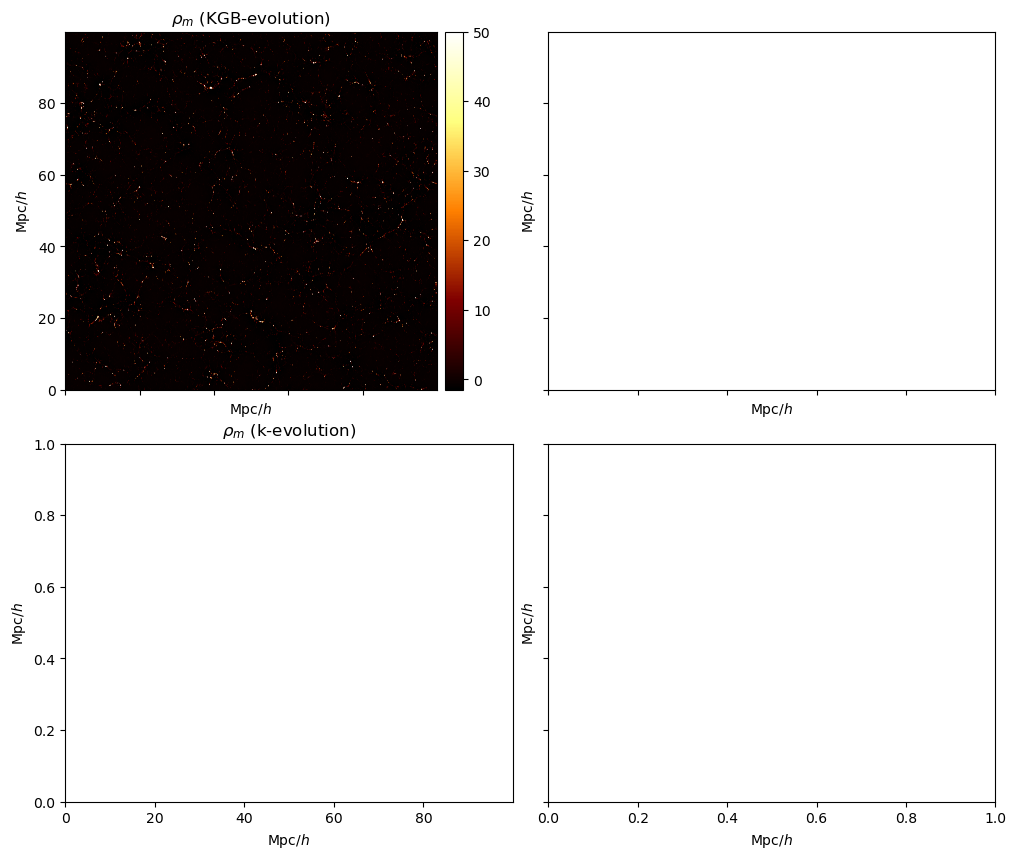

In [25]:
fig2, ax2 = plt.subplots(2, 2, figsize=(12, 10), sharey="row", sharex="col")
plt.subplots_adjust(hspace=0.15, wspace=0.08)

import matplotlib.colors as colors

boxsize = 100
Ngrid = 1200

vmin_DE = -1.5
vmax_DE = 50

for i in range(len(snapshot_KGB)):

    density_plot_KGB = snapshot_KGB[i]
    density_plot_kess = snapshot_kess[i]

    xi, yi = np.mgrid[0:Ngrid, 0:Ngrid]
    
    zi_KGB = density_plot_KGB[0:Ngrid, 0:Ngrid, 20]
    zi_kess = density_plot_kess[0:Ngrid, 0:Ngrid, 20]


    if i == 0:
        ###############################################################################################
        #                                      matter KGB
        
        m_KGB = ax2[0][i].pcolormesh(
            boxsize / Ngrid * xi,
            boxsize / Ngrid * yi,
            zi_KGB.reshape(xi.shape),
            cmap="afmhot",
            shading="gouraud",
            norm=colors.Normalize(vmin=vmin_DE, vmax=vmax_DE),
        )
        
        cbar_KGB = plt.colorbar(m_KGB, ax=ax2[0][i], orientation="vertical",pad=0.02)
        ###############################################################################################
        #                                      matter kessence
        
#         m_kess = ax2[1][i].pcolormesh(
#             boxsize / Ngrid * xi,
#             boxsize / Ngrid * yi,
#             zi_kess.reshape(xi.shape),
#             cmap="afmhot",
#             shading="gouraud",
#             norm=colors.PowerNorm(gamma=0.1),
#         )
        
#         cbar_kess = plt.colorbar(m_kess, ax=ax2[1][i], orientation="vertical", pad=0.02)



    else:
        pass
        ###############################################################################################
        #                                      DE KGB
    
#         DE_KGB = ax2[0][i].pcolormesh(
#             boxsize / Ngrid * xi,
#             boxsize / Ngrid * yi,
#             zi_KGB.reshape(xi.shape),
#             cmap="binary",
#             shading="gouraud",
#              norm=colors.Normalize(vmin=vmin_DE, vmax=vmax_DE),
#         )
        
#         cbar_KGB = plt.colorbar(DE_KGB, ax=ax2[0][i], orientation="vertical", pad=0.02)
        ###############################################################################################
        #                                      DE kessence
        
        DE_kess = ax2[1][i].pcolormesh(
            boxsize / Ngrid * xi,
            boxsize / Ngrid * yi,
            zi_kess.reshape(xi.shape),
            cmap="binary",
            shading="gouraud",
            norm=colors.PowerNorm(gamma=0.7),
        )
        
        cbar_kess = plt.colorbar(DE_kess, ax=ax2[1][i], orientation="vertical", pad=0.02)



    if i == 0:
        ax2[0][i].set_title(r"$\rho_m$ (KGB-evolution)")
        ax2[1][i].set_title(r"$\rho_m$ (k-evolution)")
    else:
        ax2[0][i].set_title(r"$\delta\rho_{\mathrm{DE}}$ (KGB-evolution)")
        ax2[1][i].set_title(r"$\delta\rho_{\mathrm{DE}}$ (k-evolution)")
        

for i in range (0,2):
    for j in range (0,2):
        ax2[i][j].set_xlabel("Mpc/$h$")
        ax2[i][j].set_ylabel("Mpc/$h$")

    
    

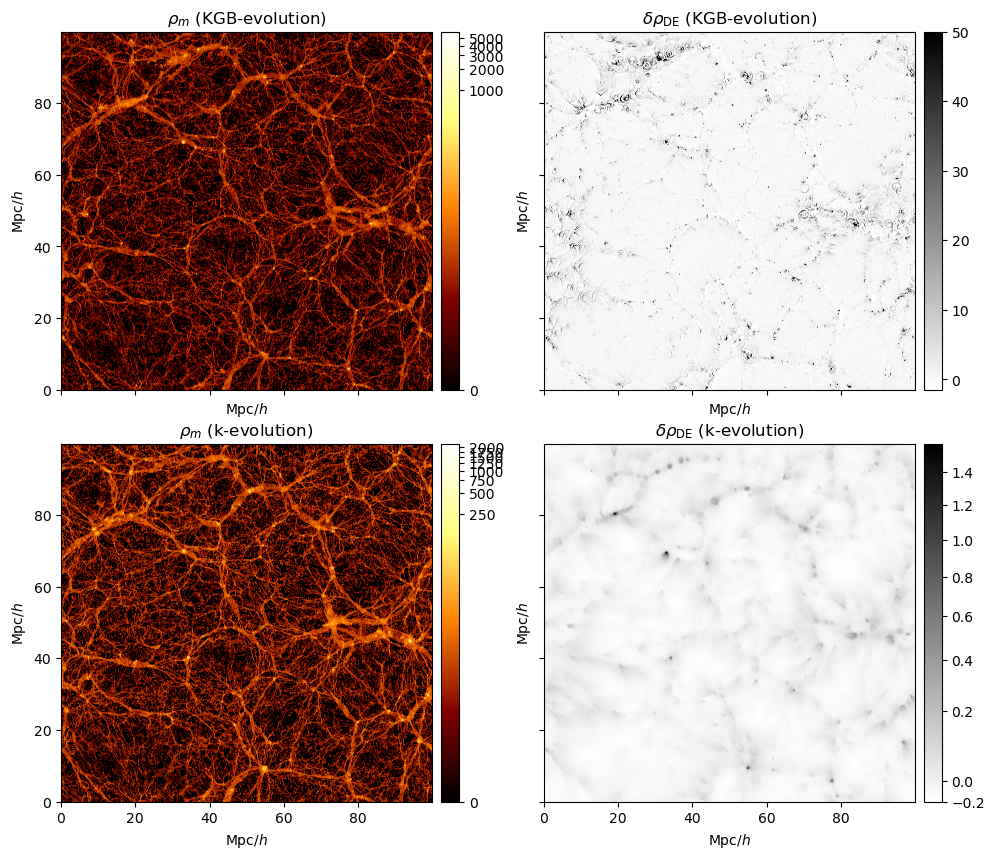

In [11]:
fig2, ax2 = plt.subplots(2, 2, figsize=(12, 10), sharey="row", sharex="col")
plt.subplots_adjust(hspace=0.15, wspace=0.08)

import matplotlib.colors as colors

boxsize = 100
Ngrid = 1200

vmin_DE = -1.5
vmax_DE = 50

for i in range(len(snapshot_KGB)):

    density_plot_KGB = snapshot_KGB[i]
    density_plot_kess = snapshot_kess[i]

    xi, yi = np.mgrid[0:Ngrid, 0:Ngrid]
    
    zi_KGB = density_plot_KGB[0:Ngrid, 0:Ngrid, 20]
    zi_kess = density_plot_kess[0:Ngrid, 0:Ngrid, 20]


    if i == 0:
        ###############################################################################################
        #                                      matter KGB
        
        m_KGB = ax2[0][i].pcolormesh(
            boxsize / Ngrid * xi,
            boxsize / Ngrid * yi,
            zi_KGB.reshape(xi.shape),
            cmap="afmhot",
            shading="gouraud",
            norm=colors.PowerNorm(gamma=0.1),
        )
        
        cbar_KGB = plt.colorbar(m_KGB, ax=ax2[0][i], orientation="vertical",pad=0.02)
        ###############################################################################################
        #                                      matter kessence
        
        m_kess = ax2[1][i].pcolormesh(
            boxsize / Ngrid * xi,
            boxsize / Ngrid * yi,
            zi_kess.reshape(xi.shape),
            cmap="afmhot",
            shading="gouraud",
            norm=colors.PowerNorm(gamma=0.1),
        )
        
        cbar_kess = plt.colorbar(m_kess, ax=ax2[1][i], orientation="vertical", pad=0.02)



    else:
        pass
        ###############################################################################################
        #                                      DE KGB
    
        DE_KGB = ax2[0][i].pcolormesh(
            boxsize / Ngrid * xi,
            boxsize / Ngrid * yi,
            zi_KGB.reshape(xi.shape),
            cmap="binary",
            shading="gouraud",
            #norm=colors.PowerNorm(gamma=0.1),
            norm=colors.Normalize(vmin=vmin_DE, vmax=vmax_DE),
        )
        
        cbar_KGB = plt.colorbar(DE_KGB, ax=ax2[0][i], orientation="vertical", pad=0.02)
        ###############################################################################################
        #                                      DE kessence
        
        DE_kess = ax2[1][i].pcolormesh(
            boxsize / Ngrid * xi,
            boxsize / Ngrid * yi,
            zi_kess.reshape(xi.shape),
            cmap="binary",
            shading="gouraud",
            #norm=colors.PowerNorm(gamma=0.1),
            norm=colors.PowerNorm(gamma=0.7),
        )
        
        cbar_kess = plt.colorbar(DE_kess, ax=ax2[1][i], orientation="vertical", pad=0.02)



    if i == 0:
        ax2[0][i].set_title(r"$\rho_m$ (KGB-evolution)")
        ax2[1][i].set_title(r"$\rho_m$ (k-evolution)")
    else:
        ax2[0][i].set_title(r"$\delta\rho_{\mathrm{DE}}$ (KGB-evolution)")
        ax2[1][i].set_title(r"$\delta\rho_{\mathrm{DE}}$ (k-evolution)")
        

for i in range (0,2):
    for j in range (0,2):
        ax2[i][j].set_xlabel("Mpc/$h$")
        ax2[i][j].set_ylabel("Mpc/$h$")
        



In [ ]:
boxsize = 100
Ngrid = 1200




# fig2, ax2 = plt.subplots(2, 2, figsize=(12, 10), sharey="row", sharex="col")
# plt.subplots_adjust(hspace=0.15, wspace=0.08)


# for i in range(len(snapshot_kess)):

#     density_plot_KGB = snapshot_KGB[i]
#     density_plot_kess = snapshot_kess[i]


    
#     zi_KGB = density_plot_KGB[0:Ngrid, 10, 40]
#     zi_kess = density_plot_kess[0:Ngrid, 10, 40]


# #     if i == 0:
        
# #     m_KGB = ax2[0][i].plot(zi_KGB)

# # #         print("matter KGb = ", zi_KGB)




# #     m_kess = ax2[1][i].plot(zi_kess)

# # #         print("matter kess = ", zi_kess)



# #     else:
# #         pass
#     DE_KGB = ax2[0][i].plot(zi_KGB)

#     print("DE KGb = ", zi_KGB)



#     DE_kess = ax2[1][i].plot(zi_kess)

#     print("DE kess = ", zi_kess)



#     if i == 0:
#         ax2[0][i].set_title(r"$\rho_m$ (KGB-evolution)")
#         ax2[1][i].set_title(r"$\rho_m$ (k-evolution)")
#     else:
#         ax2[0][i].set_title(r"$\rho_{\mathrm{DE}}$ (KGB-evolution)")
#         ax2[1][i].set_title(r"$\rho_{\mathrm{DE}}$ (k-evolution)")
        

# for i in range (0,2):
#     for j in range (0,2):
#         ax2[i][j].set_xlabel("Mpc/$h$")
#         ax2[i][j].set_ylabel("Mpc/$h$")

    




for i in range(len(snapshot_kess)):

    density_plot_KGB = snapshot_KGB[i]
    density_plot_kess = snapshot_kess[i]


    
    zi_KGB = density_plot_KGB[0:Ngrid, 27, 40]
    zi_kess = density_plot_kess[0:Ngrid, 27, 40]
    
    print(np.average(density_plot_KGB))
    print(np.average(density_plot_kess))


DE KGb =  [0.         0.         0.         ... 0.1458445  0.24462601 0.02530632]
DE kess =  [0.0138661  0.06304348 0.         ... 0.08631962 0.03123371 0.02026525]
DE KGb =  [-0.23700894 -0.05471948 -0.33067975 ... -2.63714668 -5.72280357
 -6.62440336]
DE kess =  [-0.0208205  -0.02157976 -0.02199265 ... -0.01649204 -0.01797237
 -0.01958472]


In [30]:
Ngrid = 1200
density_plot_KGB = snapshot_KGB[0]
zi_KGB = density_plot_KGB[0:Ngrid, 27, 40]

In [31]:
np.average(zi_KGB)

0.14794891689827874

In [143]:
2048*2

4096

In [145]:
np.pi*2048/500

12.867963509103793

# 

In [146]:
2048/18

113.77777777777777

In [155]:
2048/64

32.0

In [134]:
# import numpy as np
# import readsnap,readgadget
# import MAS_library as MASL
# import sys,os

# # This library contains scripts that can be used to plot density field

# # This routine finds the name of the density field
# def density_field_name(snapshot_fname, x_min, x_max, y_min, y_max, 
#                        z_min, z_max, dims, ptypes, plane, MAS):

#     # this is a number that describes the ptypes used.
#     # ptypes = [1] -----> part_num = 2
#     # ptypes = [0,1] ---> part_num = 3
#     # ptypes = [0,4] ---> part_num = 17
#     part_num = np.sum(2**np.array(ptypes))

#     # name of the density field
#     f_df = 'density_field_%.3f_%.3f_%.3f_%.3f_%.3f_%.3f_%d_%d_%s_%s_%s.npy'\
#            %(x_min, x_max, y_min, y_max, z_min, z_max, dims, part_num, 
#              plane, MAS, snapshot_fname[-3:])

#     return f_df

# # This routine computes the coordinates of the density field square 
# def geometry(snapshot_fname, plane, x_min, x_max, y_min, y_max, z_min, z_max):

#     # read snapshot head and obtain BoxSize
#     head    = readgadget.header(snapshot_fname)
#     BoxSize = head.boxsize/1e3 #Mpc/h                    

#     plane_dict = {'XY':[0,1], 'XZ':[0,2], 'YZ':[1,2]}

#     # check that the plane is square
#     if plane=='XY':
#         length1 = x_max-x_min;  length2 = y_max-y_min;  depth = z_max-z_min 
#         offset1 = x_min;        offset2 = y_min
#     elif plane=='XZ':
#         length1 = x_max-x_min;  length2 = z_max-z_min;  depth = y_max-y_min 
#         offset1 = x_min;        offset2 = z_min
#     else:
#         length1 = y_max-y_min;  length2 = z_max-z_min;  depth = x_max-x_min 
#         offset1 = y_min;        offset2 = z_min
#     if length1!=length2:
#         print('Plane has to be a square!!!'); sys.exit()
#     BoxSize_slice = length1

#     return length1, offset1, length2, offset2, depth, BoxSize_slice


# # This routine reads the positions (and masses) of the particle type choosen
# # and computes the 2D density field using NGP, CIC, TSC or PCS
# def density_field_2D(snapshot_fname, x_min, x_max, y_min, y_max, z_min, z_max,
#                      dims, ptypes, plane, MAS, save_density_field):
    
#     plane_dict = {'XY':[0,1], 'XZ':[0,2], 'YZ':[1,2]}

#     # read snapshot head and obtain BoxSize, filenum...
#     head     = readgadget.header(snapshot_fname)
#     BoxSize  = head.boxsize/1e3 #Mpc/h                    
#     Nall     = head.nall
#     Masses   = head.massarr*1e10 #Msun/h                  
#     filenum  = head.filenum
#     redshift = head.redshift

#     # find the geometric values of the density field square
#     len_x, off_x, len_y, off_y, depth, BoxSize_slice = \
#             geometry(snapshot_fname, plane, x_min, x_max, y_min, y_max, 
#                     z_min, z_max)

#     # compute the mean density in the box
#     if len(ptypes)==1 and Masses[ptypes[0]]!=0.0:
#         single_specie = True
#     else:
#         single_specie = False

#     # define the density array
#     overdensity = np.zeros((dims,dims), dtype=np.float32)

#     # do a loop over all subfiles in the snapshot
#     total_mass, mass_slice = 0.0, 0.0;  renormalize_2D = False
#     for i in range(filenum):

#         # find the name of the subfile
#         snap = snapshot_fname 

#         # in the last snapshot we renormalize the field
#         if i==filenum-1:  renormalize_2D = True

#         # do a loop over 
#         for ptype in ptypes:

#             # read the positions of the particles in Mpc/h
#             pos = readgadget.read_field(snap,"POS ",ptype)/1e3

#             if single_specie:  total_mass += len(pos)

#             # keep only with the particles in the slice
#             indexes = np.where((pos[:,0]>x_min) & (pos[:,0]<x_max) &
#                                (pos[:,1]>y_min) & (pos[:,1]<y_max) &
#                                (pos[:,2]>z_min) & (pos[:,2]<z_max) )
#             pos = pos[indexes]

#             # renormalize positions
#             pos[:,0] -= x_min;  pos[:,1] -= y_min;  pos[:,2] -= z_min

#             # project particle positions into a 2D plane
#             pos = pos[:,plane_dict[plane]]

#             # read the masses of the particles in Msun/h
#             if not(single_specie):
#                 mass = readgadget.read_field(snap,"MASS",ptype)*1e10
#                 total_mass += np.sum(mass, dtype=np.float64)
#                 mass = mass[indexes]
#                 MASL.MA(pos, overdensity, BoxSize_slice, MAS=MAS, W=mass,
#                         renormalize_2D=renormalize_2D)
#             else:
#                 mass_slice += len(pos)
#                 MASL.MA(pos, overdensity, BoxSize_slice, MAS=MAS, W=None,
#                         renormalize_2D=renormalize_2D)

#     print('Expected mass = %.7e'%mass_slice)
#     print('Computed mass = %.7e'%np.sum(overdensity, dtype=np.float64))

#     # compute mean density in the whole box
#     mass_density = total_mass*1.0/BoxSize**3 #(Msun/h)/(Mpc/h)^3 or #/(Mpc/h)^3

#     print('mass density = %.5e'%mass_density)

#     # compute the volume of each cell in the density field slice
#     V_cell = BoxSize_slice**2*depth*1.0/dims**2  #(Mpc/h)^3

#     # compute the mean mass in each cell of the slice
#     mean_mass = mass_density*V_cell #Msun/h or #

#     # compute overdensities
#     print(np.min(overdensity),'< rho/<rho> <',np.max(overdensity))

#     # in our convention overdensity(x,y), while for matplotlib is
#     # overdensity(y,x), so we need to transpose the field
#     overdensity = np.transpose(overdensity)

#     # save density field to file
#     f_df = density_field_name(snapshot_fname, x_min, x_max, y_min, y_max, 
#                               z_min, z_max, dims, ptypes, plane, MAS)
#     if save_density_field:  np.save(f_df, overdensity)

#     return overdensity








# overdensity = density_field_2D(
#     snapshot,
#     x_min,
#     x_max,
#     y_min,
#     y_max,
#     z_min,
#     z_max,
#     grid,
#     ptypes,
#     plane,
#     MAS,
#     save_df,
# )


